In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid = pd.read_csv('aggregate_covid_country.csv')
covid.head(5)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
print(covid['Country'].value_counts())
print(covid['Country'].value_counts().unique())

Hungary        126
Zimbabwe       126
Peru           126
Guatemala      126
Malaysia       126
              ... 
Saint Lucia    126
Poland         126
Portugal       126
Fiji           126
El Salvador    126
Name: Country, Length: 188, dtype: int64
[126]


In [4]:
covid.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

(array([126.,   0.,   0.,   0.,   0., 126.,   0.,   0.,   0., 126.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

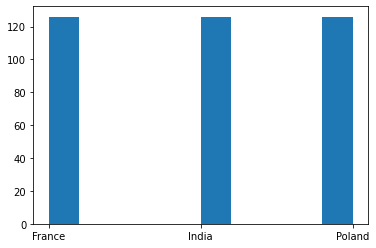

In [5]:
plt.hist(covid['Country'][(covid['Country'] == 'France') | (covid['Country'] == 'Poland') | (covid['Country'] == 'India')])

In [6]:
covid['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [7]:
covid.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [8]:
covid.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


Numbers for these columns are largely varied, since they are real life cases it is as expected, since the numbers are large, we wil transform these numbers to make them smaller

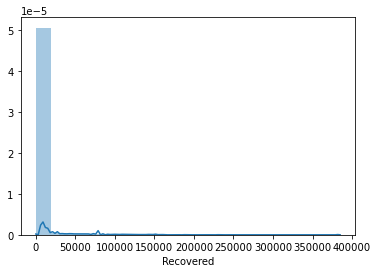

In [9]:
sns.distplot(covid['Recovered'], bins=20)

Immensely right skewed, let's transform this column

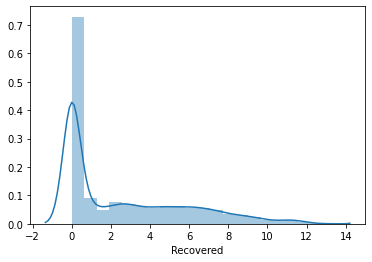

In [10]:
covid['Recovered'] = np.log(1+covid['Recovered'])
#Since there are 0 also so log will make infinite value so we have added 1
sns.distplot(covid['Recovered'], bins=20)

Looks better now

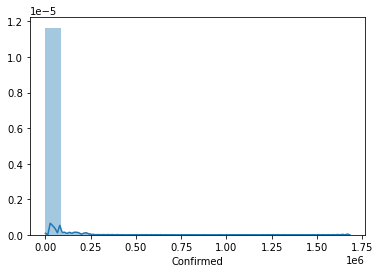

In [11]:
sns.distplot(covid['Confirmed'], bins=20)

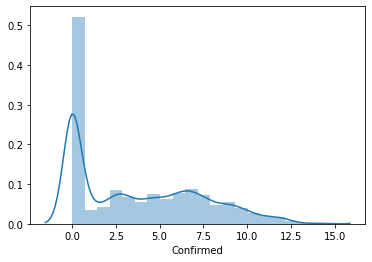

In [12]:
covid['Confirmed'] = np.log(1+covid['Confirmed'])
#Since there are 0 also so log will make infinite value so we have added 1
sns.distplot(covid['Confirmed'], bins=20)

Since Death is target variable we won't transform it

Also date is not at all related to deaths, it is simply related to confirmed number of cases and recoveries, hence we will drop date column.

In [13]:
covid.drop(['Date'], 1, inplace=True)
covid.head()

,Country,Confirmed,Recovered,Deaths
0,Afghanistan,0.0,0.0,0
1,Albania,0.0,0.0,0
2,Algeria,0.0,0.0,0
3,Andorra,0.0,0.0,0
4,Angola,0.0,0.0,0


In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
le = LabelEncoder()

In [15]:
dict1 = []
covid['Country'] = le.fit_transform(covid['Country'])
dict1.append({key: value for key,value in enumerate(le.classes_)})
print(dict1)

[{0: 'Afghanistan', 1: 'Albania', 2: 'Algeria', 3: 'Andorra', 4: 'Angola', 5: 'Antigua and Barbuda', 6: 'Argentina', 7: 'Armenia', 8: 'Australia', 9: 'Austria', 10: 'Azerbaijan', 11: 'Bahamas', 12: 'Bahrain', 13: 'Bangladesh', 14: 'Barbados', 15: 'Belarus', 16: 'Belgium', 17: 'Belize', 18: 'Benin', 19: 'Bhutan', 20: 'Bolivia', 21: 'Bosnia and Herzegovina', 22: 'Botswana', 23: 'Brazil', 24: 'Brunei', 25: 'Bulgaria', 26: 'Burkina Faso', 27: 'Burma', 28: 'Burundi', 29: 'Cabo Verde', 30: 'Cambodia', 31: 'Cameroon', 32: 'Canada', 33: 'Central African Republic', 34: 'Chad', 35: 'Chile', 36: 'China', 37: 'Colombia', 38: 'Comoros', 39: 'Congo (Brazzaville)', 40: 'Congo (Kinshasa)', 41: 'Costa Rica', 42: "Cote d'Ivoire", 43: 'Croatia', 44: 'Cuba', 45: 'Cyprus', 46: 'Czechia', 47: 'Denmark', 48: 'Diamond Princess', 49: 'Djibouti', 50: 'Dominica', 51: 'Dominican Republic', 52: 'Ecuador', 53: 'Egypt', 54: 'El Salvador', 55: 'Equatorial Guinea', 56: 'Eritrea', 57: 'Estonia', 58: 'Eswatini', 59: 'Et

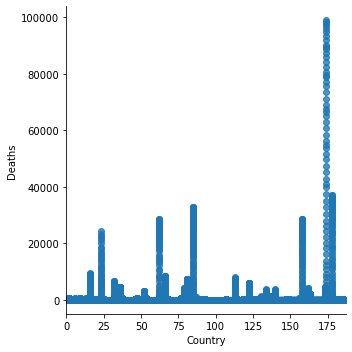

In [16]:
sns.lmplot(x='Country', y='Deaths', data=covid)

I can see that with country there is a relation with the number of deaths.

So I will try to find the relation among other variables and will try to find out if there is any relation of country with any other dependent variables or not.

In [17]:
covcor = covid.corr()
covcor

,Country,Confirmed,Recovered,Deaths
Country,1.000000,-0.007275,-0.023209,0.064954
Confirmed,-0.007275,1.000000,0.926376,0.310155
Recovered,-0.023209,0.926376,1.000000,0.325037
Deaths,0.064954,0.310155,0.325037,1.000000


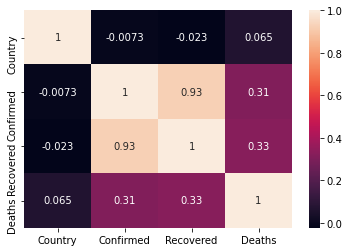

In [18]:
sns.heatmap(covcor, annot=True)

Country is not too much related to any other variable, but as we can see that Recovered and Confirmed are too much interdependent we can drop either one of those or we can ignore them, as if we drop either one of them then we lose an important dependent variable, so let's keep them.
Deaths is also very less dependent on Country so we can drop it.

In [19]:
covid.drop(['Country'],1,inplace=True)
covid.head()

,Confirmed,Recovered,Deaths
0,0.0,0.0,0
1,0.0,0.0,0
2,0.0,0.0,0
3,0.0,0.0,0
4,0.0,0.0,0


In [20]:
print(min(covid['Confirmed'].value_counts()))
print((covid['Confirmed'].value_counts()))
print(covid['Recovered'].value_counts())
print(covid['Deaths'].value_counts())

1
0.000000     8056
0.693147      799
1.098612      310
1.386294      293
2.833213      223
             ... 
10.191332       1
11.431748       1
8.783549        1
10.966939       1
12.243537       1
Name: Confirmed, Length: 5308, dtype: int64
0.000000     11100
0.693147       866
1.098612       517
1.609438       264
1.386294       262
             ...  
6.895683         1
11.872703        1
9.410174         1
7.912789         1
10.507230        1
Name: Recovered, Length: 3303, dtype: int64
0        12989
1         1244
2          655
3          550
4          324
         ...  
473          1
4603         1
521          1
2600         1
30689        1
Name: Deaths, Length: 1768, dtype: int64


# Feature Scaling

In [21]:
mms = MinMaxScaler()

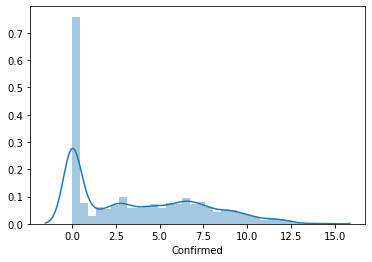

In [22]:
sns.distplot(covid['Confirmed'])

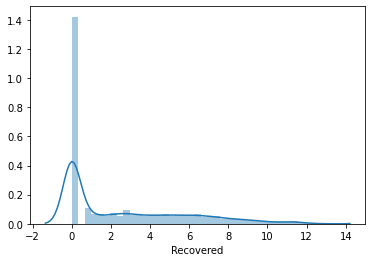

In [23]:
sns.distplot(covid['Recovered'])

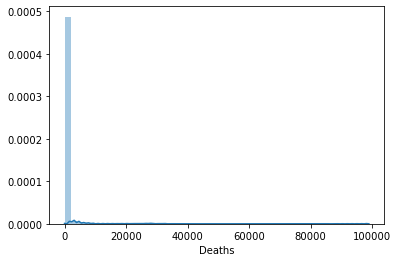

In [24]:
sns.distplot(covid['Deaths'])

covid['Deaths'] Numbers are varied over very large range, let's transform it too, since we have transformed other 2 columns using log transformation, so we will use same method for Deaths columns as well

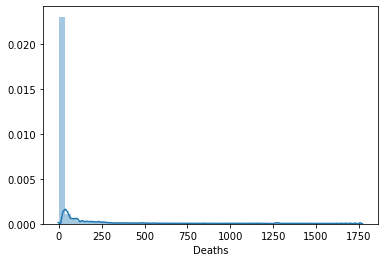

In [25]:
covid['Deaths'] = le.fit_transform(1+covid['Deaths'])
sns.distplot(covid['Deaths'])

In [26]:
covid.tail()

,Confirmed,Recovered,Deaths
23683,6.063785,5.902633,3
23684,2.302585,1.945910,1
23685,5.521461,2.397895,49
23686,6.825460,5.820083,7
23687,4.043051,3.258097,4


# Model Building

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [28]:
x = covid.drop(["Deaths"],1)
y = covid["Deaths"]
print(x.sample(5))
print(y.sample(5))

       Confirmed  Recovered
18675   5.624018   4.219508
10083   0.000000   0.000000
16943  10.670814  10.042902
5708    0.000000   0.000000
20302   5.123964   4.718499
113        0
22769    141
22051      7
19393      2
6085       0
Name: Deaths, dtype: int64


In [29]:
def rstate(model):
    rscore = []
    for i in range(1,201):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=i)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        rscore.append(r2_score(y_test, pred))
    return rscore.index(max(rscore))+1

In [30]:
lm = LinearRegression()
rid = Ridge()
las = Lasso()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=10)
abr = AdaBoostRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()

In [31]:
def regress(model, x, y):
    rs = rstate(model)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3, random_state=rs)
    # Model training
    model.fit(x_train, y_train)
    # Model Prediction
    pred = model.predict(x_test)
    #Cross validation
    score = cross_val_score(model, x,y, cv=5)
    print("---------------------------------------------------------------------------------------------")
    print("Mean Squared Error of {} is:".format(modelname[modelArr.index(model)]),mean_squared_error(y_test, pred))
    print("Root Mean Squared Error of {} is:".format(modelname[modelArr.index(model)]),np.sqrt(mean_squared_error(y_test, pred)))
    print("Mean Absolute Error of {} is:".format(modelname[modelArr.index(model)]),mean_absolute_error(y_test, pred))
    print("R2 score of {} is:".format(modelname[modelArr.index(model)]),r2_score(y_test, pred))
    print("Cross validation score of {} is:".format(modelname[modelArr.index(model)]),np.mean(score))
    print("Random State used is: ",rs)
    print("---------------------------------------------------------------------------------------------")
    return np.mean(score)

In [32]:
modelArr = [lm, rid, las, dtr, rfr, abr, etr, gbr]
modelname = ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTreeRegressor',
             'RandomForestRegressor', 'AdaBoostRegressor', 'ExtraTreesRegressor', 'GradientBoostingRegressor']

#modelArr = [lm, rid, las, dtr, rfr, abr]
#modelname = ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTreeRegressor',
             #'RandomForestRegressor', 'AdaBoostRegressor']

In [33]:
cv_scores = []
for i in modelArr:
    cv_scores.append(regress(i, x, y))
cv_scores

---------------------------------------------------------------------------------------------
Mean Squared Error of LinearRegression is: 46963.998343450534
Root Mean Squared Error of LinearRegression is: 216.71178635102092
Mean Absolute Error of LinearRegression is: 135.63576629198502
R2 score of LinearRegression is: 0.43494991903917846
Cross validation score of LinearRegression is: -1.0863521453271408
Random State used is:  13
---------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
Mean Squared Error of Ridge is: 46964.04530772305
Root Mean Squared Error of Ridge is: 216.71189470751958
Mean Absolute Error of Ridge is: 135.63578865187876
R2 score of Ridge is: 0.4349493539857988
Cross validation score of Ridge is: -1.086363084109505
Random State used is:  13
---------------------------------------------------------------------------------------------
------

[-1.0863521453271408,
 -1.086363084109505,
 -1.0779578839318202,
 0.7813133164529795,
 0.8655643760971025,
 0.8955399624610736,
 0.8620522276286027,
 0.9038337396173626]

In [35]:
print("Best model is:",modelname[cv_scores.index(max(cv_scores))])

Best model is: GradientBoostingRegressor


As we can see best Model is Gradient Boost Regression.

Let's save this model in pickle

In [36]:
import pickle as pk

In [39]:
with open('Covid_Pickle', 'wb') as f:
    pk.dump(gbr,f)

In [40]:
with open('Covid_Pickle', 'rb') as f:
    model = pk.load(f)


pred = model.predict(x_test)
pred

array([6.16042125e-01, 6.16042125e-01, 6.16042125e-01, ...,
       6.94412909e-01, 8.39703211e+02, 4.90350849e+01])